In [4]:
import cv2 as cv
import numpy as np

In [5]:
from evaluation.config import *

time_config = TimingConfig(
    frames_per_sec=60,
    imaging_time_ms=200,
    pred_time_ms=40,
    moving_time_ms=50,
    px_per_mm=90,
    camera_size_mm=(4, 4),
    micro_size_mm=(0.225, 0.225),
)

Correlation Coefficient: 0.73
Correlation Slope: 0.81


,wrm_speed,bbox_area_diff
count,1282.000000,1282.000000
mean,0.460060,0.119760
std,0.138586,0.153265
min,0.330030,0.000000
10%,0.341091,0.000000
20%,0.356946,0.000000
30%,0.373404,0.023303
40%,0.394308,0.045846
50%,0.418755,0.067110
60%,0.445794,0.102350


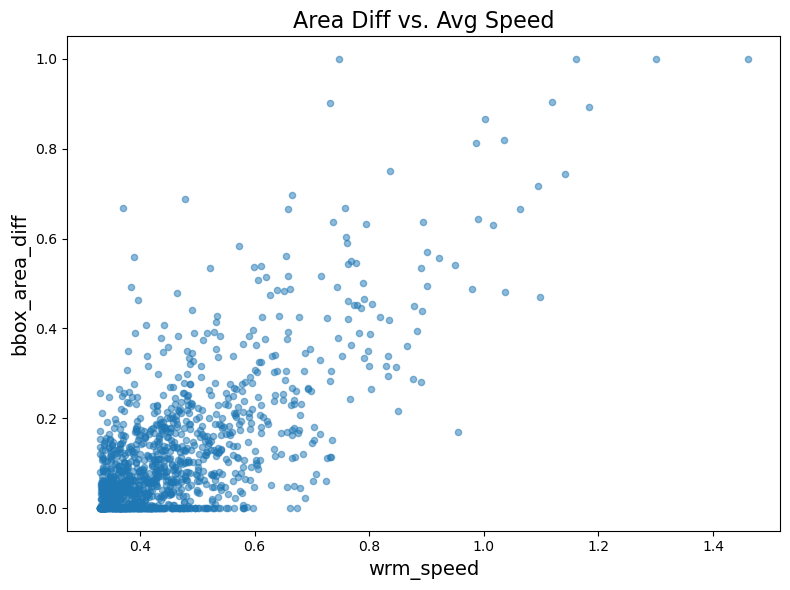

In [6]:
from evaluation.analysis import Plotter
plt = Plotter("logs2/bboxes.csv", time_config)
plt.plot_area_vs_speed(min_speed=0.33)

In [ ]:
cv.destroyAllWindows()
raise Exception("Finished")

In [1]:
from evaluation.simulator import *
from evaluation.sim_controllers import *
from utils.path_utils import Files
from evaluation.config import *

experiment_config = ExperimentConfig(
    name="exp1",
    num_frames=61200,
    frames_per_sec=60,
    orig_resolution=(1920, 1080),
    px_per_mm=90,
    init_position=(1300, 1200),
)

""" experiment_config = ExperimentConfig(
    name="exp1",
    num_frames=1200,
    frames_per_sec=60,
    orig_resolution=(1920, 1080),
    px_per_mm=90,
    init_position=(1300, 1200),
) """

time_config = TimingConfig(
    frames_per_sec=60,
    imaging_time_ms=200,
    pred_time_ms=40,
    moving_time_ms=50,
    px_per_mm=90,
    camera_size_mm=(4, 4),
    micro_size_mm=(0.225, 0.225),
)

log_config = LogConfig(
    root_folder="logs2/",
    save_mic_view=False,
    save_cam_view=False,
    save_err_view=False,
)

yolo_config = YoloConfig(
    model_path="yolov8m-trained.pt",
    verbose=True,
)

log_config.create_dirs()


time_config.save_json("logs/time_config.json")
log_config.save_json("logs/log_config.json")
yolo_config.save_json("logs/yolo_config.json") 
experiment_config.save_json("logs/experiment_config.json")

"""
frames_path = "Archive/"
files = Files(frames_path, extension="Bmp", sorting_key=lambda f: int(f.split("-")[-1].split(".")[0]))
files_list = [file for file in files]
reader = FrameReader(frames_path, files_list) """

# reader = FrameReader.create_from_directory("/mnt/c/Users/freid/Desktop/eval/micro")


""" time_config = TimingConfig.load_json("logs/time_config.json")
log_config = LogConfig.load_json("logs/log_config.json")
yolo_config = YoloConfig.load_json("logs/yolo_config.json") """

' time_config = TimingConfig.load_json("logs/time_config.json")\nlog_config = LogConfig.load_json("logs/log_config.json")\nyolo_config = YoloConfig.load_json("logs/yolo_config.json") '

In [ ]:
print(time_config.imaging_frame_num + time_config.moving_frame_num)

In [2]:
from evaluation.sim_controllers.test_controller1 import TestController1
from evaluation.sim_controllers.polyfit_controller import PolyfitController

# sim_controller = YoloController(time_config, yolo_config)
#sim_controller = TestController1(time_config, "bboxes.csv")
sim_controller = PolyfitController(time_config, "bboxes.csv", degree=1)
#sim_controller = OptimalController(time_config, "bboxes.csv")
#sim_controller = CsvController(time_config, "bboxes.csv")
log_controller = LoggingController(sim_controller, log_config)
sim = Simulator(time_config, experiment_config, log_controller)

In [3]:
sim.run(visualize=False)

Simulation Progress:   0%|          | 0/4080 [00:00<?, ?cycle/s]

In [ ]:
from cProfile import Profile
from pstats import Stats, SortKey

with Profile() as pr:
    sim.run(visualize=False)
    Stats(pr).sort_stats(SortKey.CUMULATIVE).print_stats()

In [ ]:
cv.destroyAllWindows()
raise Exception("Finished")

In [ ]:
from frame_reader import FrameReader

reader = FrameReader.create_from_directory("Archive/")

In [ ]:
from dataset.create.box_calculator import BoxCalculator
from dataset.create.sample_extractor import SampleExtractor

bbox_calc = BoxCalculator(reader)
extractor = SampleExtractor(bbox_calc)
extractor.create_all_samples(target_size=(400, 400), save_folder="samples")

In [ ]:
import mealpy
from mealpy.swarm_based.PSO import OriginalPSO

from evaluation.sim_controllers.csv_controller import CsvController

controller = CsvController(time_config, "bboxes.csv")
controller.predict()